In [3]:
import pandas as pd

In [2]:
import pyarrow.parquet as pq
parquet_file = pq.ParquetFile('../data/atlas_public_2024-07-16.parquet')
unique_species_df = pd.DataFrame(columns=['valid_scientific_name','group_en', 'observed_rank', 'kingdom', 'order', 'family'])


for i, batch in enumerate(parquet_file.iter_batches(batch_size=10000)):
    print(i)
    batch_df = batch.to_pandas()
    #add to unique_species_df only if its not already there
    unique_species_df = pd.concat([unique_species_df, batch_df[~batch_df['valid_scientific_name'].isin(unique_species_df['valid_scientific_name'])]])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
unique_species_df = unique_species_df[['valid_scientific_name','group_en', 'observed_rank', 'kingdom', 'order', 'family']]
#keep only unique rows based on valid_scientific_name
unique_species_df = unique_species_df.drop_duplicates(subset='valid_scientific_name')
unique_species_df

,valid_scientific_name,group_en,observed_rank,kingdom,order,family
0,Myriophyllum spicatum,Angiosperms,species,Plantae,Saxifragales,Haloragaceae
1,Impatiens glandulifera,Angiosperms,species,Plantae,Ericales,Balsaminaceae
2,Heracleum mantegazzianum,Angiosperms,species,Plantae,Apiales,Apiaceae
3,Popillia japonica,Arthropods,species,Animalia,Coleoptera,Scarabaeidae
7,Eichhornia crassipes,Angiosperms,species,Plantae,Commelinales,Pontederiaceae
...,...,...,...,...,...,...
8286,Viviparus,Other invertebrates,genus,Animalia,Viviparida,Viviparidae
8290,Cardiidae,Other invertebrates,family,Animalia,Cardiida,Cardiidae
8292,Truncilla truncata,Other invertebrates,species,Animalia,Unionida,Unionidae
8311,Monacha cantiana,Other invertebrates,species,Animalia,Helicida,Hygromiidae


In [4]:
#save to csv
unique_species_df.to_csv('../data/biodiv_species.csv', index=False)

In [7]:
unique_species_df

,valid_scientific_name,group_en,observed_rank,kingdom,order,family
0,Myriophyllum spicatum,Angiosperms,species,Plantae,Saxifragales,Haloragaceae
1,Impatiens glandulifera,Angiosperms,species,Plantae,Ericales,Balsaminaceae
2,Heracleum mantegazzianum,Angiosperms,species,Plantae,Apiales,Apiaceae
3,Popillia japonica,Arthropods,species,Animalia,Coleoptera,Scarabaeidae
7,Eichhornia crassipes,Angiosperms,species,Plantae,Commelinales,Pontederiaceae
...,...,...,...,...,...,...
8286,Viviparus,Other invertebrates,genus,Animalia,Viviparida,Viviparidae
8290,Cardiidae,Other invertebrates,family,Animalia,Cardiida,Cardiidae
8292,Truncilla truncata,Other invertebrates,species,Animalia,Unionida,Unionidae
8311,Monacha cantiana,Other invertebrates,species,Animalia,Helicida,Hygromiidae


In [10]:
print("Nb of groups: ", unique_species_df['group_en'].nunique())
print("Nb of species: ", unique_species_df['valid_scientific_name'].nunique())
print("Nb of families: ", unique_species_df['family'].nunique())
print("Nb of orders: ", unique_species_df['order'].nunique())
print("Nb of kingdoms: ", unique_species_df['kingdom'].nunique())

Nb of groups:  17
Nb of species:  30971
Nb of families:  3058
Nb of orders:  903
Nb of kingdoms:  8


In [7]:
#plot the number of species per group
import matplotlib.pyplot as plt
unique_species_df['group_en'].value_counts().plot(kind='bar')
plt.show()

NameError: name 'unique_species_df' is not defined

In [4]:
#load functionnal group df
df_func_group = pd.read_csv('../data/saved_df/species_fn_group_df.csv')
df_func_group.drop(columns=['Unnamed: 0'], inplace=True)

df_func_group

,Species,Habitat,Big Functional Group,Specific Functional Group
0,Fratercula arctica,aquatic,carnivores,predators
1,Bombycilla cedrorum,terrestrial,frugivores,frugivores
2,Scoparia biplagialis,terrestrial,invertebrates,invertebrates
3,Hydrobates,aquatic,carnivores,predators
4,Lysimachia terrestris,terrestrial,primary producers,forbs
...,...,...,...,...
28848,Temora longicornis,aquatic,consumers,zooplankton
28849,Herpotrichia,aquatic,consumers,Filter Feeders
28850,Oikopleura,aquatic,consumers,Filter Feeders
28851,Aleurodiscus lividocaeruleus,terrestrial,detritivores and decomposers,fungi


In [8]:
# from species add group_en, observed_rank, kingdom, order, family to the df_func_group df
df_func_group = df_func_group.merge(unique_species_df, how='left', left_on='Species', right_on='valid_scientific_name')

NameError: name 'unique_species_df' is not defined

In [10]:
df_taxo_group = pd.read_csv('../data/saved_df/biodiv_species.csv')

In [11]:
df_taxo_group

,valid_scientific_name,group_en,observed_rank,kingdom,order,family
0,Myriophyllum spicatum,Angiosperms,species,Plantae,Saxifragales,Haloragaceae
1,Impatiens glandulifera,Angiosperms,species,Plantae,Ericales,Balsaminaceae
2,Heracleum mantegazzianum,Angiosperms,species,Plantae,Apiales,Apiaceae
3,Popillia japonica,Arthropods,species,Animalia,Coleoptera,Scarabaeidae
4,Eichhornia crassipes,Angiosperms,species,Plantae,Commelinales,Pontederiaceae
...,...,...,...,...,...,...
30966,Viviparus,Other invertebrates,genus,Animalia,Viviparida,Viviparidae
30967,Cardiidae,Other invertebrates,family,Animalia,Cardiida,Cardiidae
30968,Truncilla truncata,Other invertebrates,species,Animalia,Unionida,Unionidae
30969,Monacha cantiana,Other invertebrates,species,Animalia,Helicida,Hygromiidae


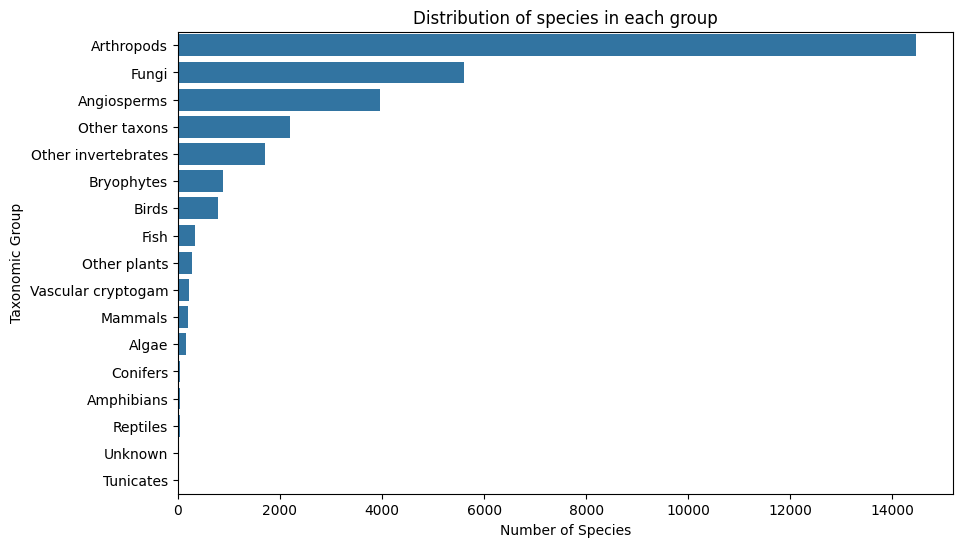

In [15]:
#plot distribution of species in each group
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y='group_en', data=df_taxo_group, order = df_taxo_group['group_en'].value_counts().index)
plt.title('Distribution of species in each group')
plt.xlabel('Number of Species')
plt.ylabel('Taxonomic Group')
plt.show()

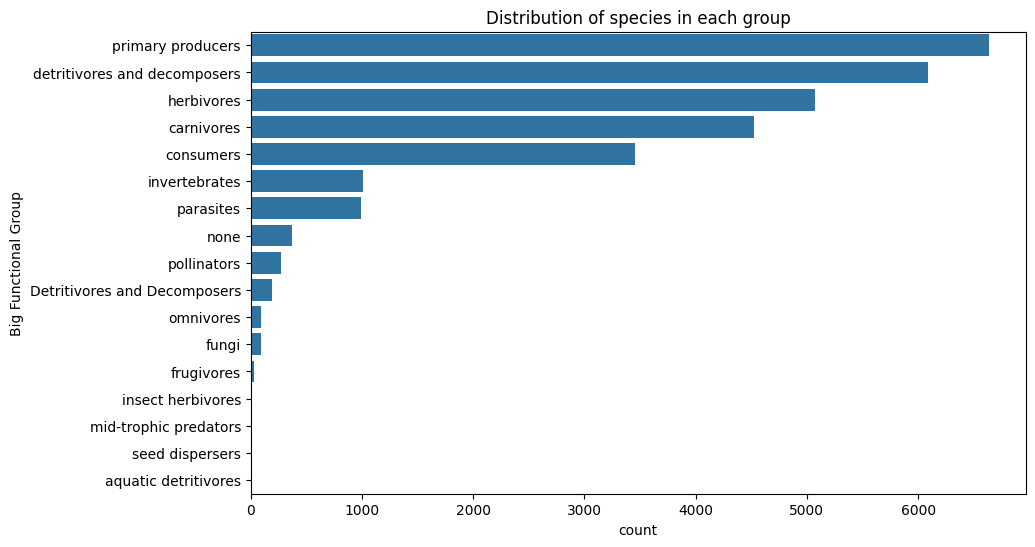

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y='Big Functional Group', data=df_func_group, order = df_func_group['Big Functional Group'].value_counts().index)
plt.title('Distribution of species in each group')
plt.show()